In [2]:
from matplotlib import font_manager
from numpy import random
import matplotlib.pyplot as plt
import numpy as np

Tried to grab the right fonts from https://design-system.economist.com/foundations/typography/typefaces, but I don't think that worked out quite right.

In [7]:
font_path = './resources/fonts/ITC Officina Sans Std Bold.otf'
font_manager.fontManager.addfont(font_path)

font_path = './resources/fonts/econsanscndreg-webfont.woff.ttf'
font_manager.fontManager.addfont(font_path)

Used a color picker to get the hex codes for the colors from the original chart.

In [9]:
FIGSIZE = (16, 9)
BACKGROUND_COLOR = '#f1f0ea'
BAR_COLOR = '#f04d45'

No effort made here to recreate the actual data used for the bars. Spirit was the distribution looks like before event and then distribution changed: that was modeled via random normal pulls.

In [5]:
before, after = 10, 10
acts = [np.abs(n) for n in np.random.normal(150, 40, before) + 50]
acts.extend(np.abs(n) for n in np.random.normal(50, 40, after))

# The Meat

This is where all the tweaking, configuration, and magic ends up to get it to look as close as I had patience to make it look to the original.

Notable aspects I gave up on ...

- I couldn't determine how to create the figure with additional space around the whole image like in the original
- The fonts aren't quite right ... again, got them close enough and gave up ...
- There didn't appear a way to specify the year ticks as minor ticks with zero height and bookend the plot xaxis with non-zero height minor ticks

N.B., the plot looks completely different in PyCharm (because it messes with render colors) but looks right in the saved export.

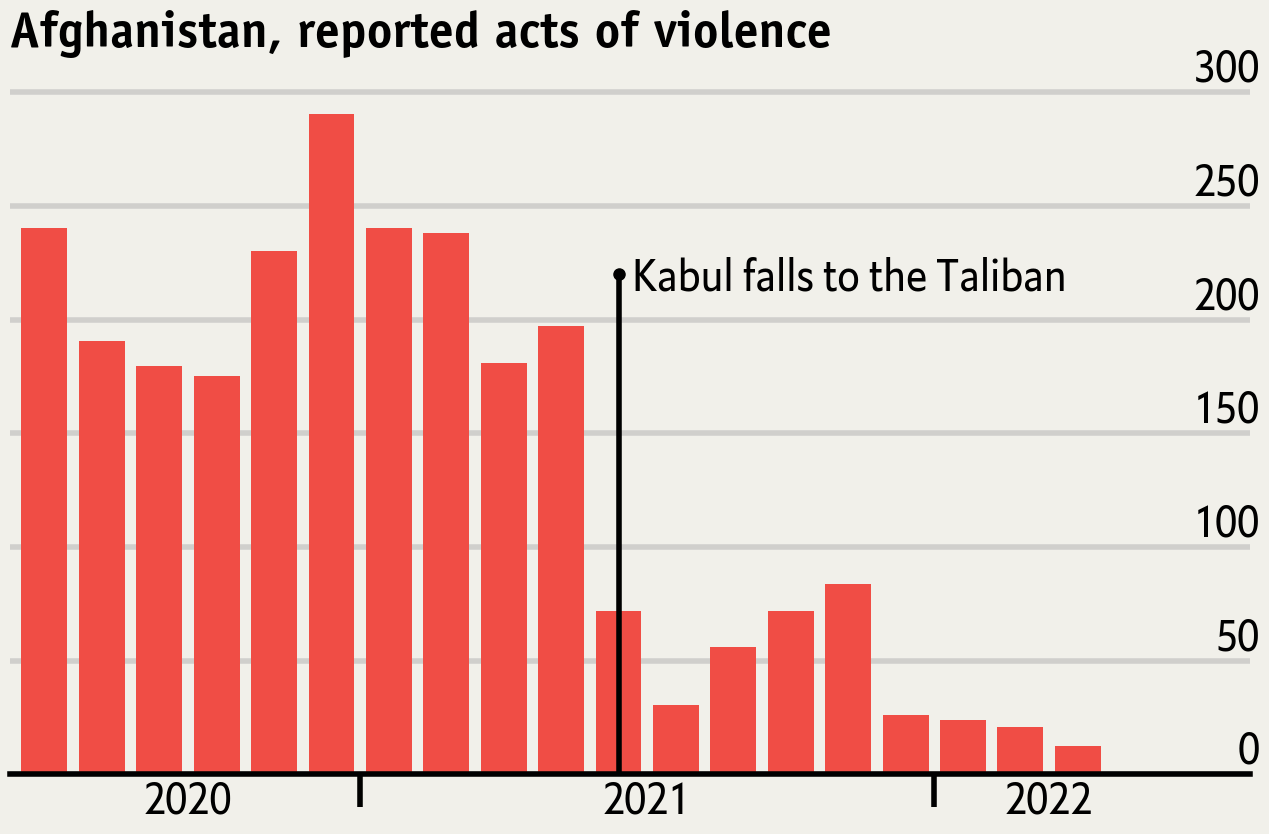

In [11]:
fig, ax = plt.subplots(figsize=FIGSIZE)

fig.set_facecolor(BACKGROUND_COLOR)

ax.bar(range(len(acts)), acts, color=BAR_COLOR, zorder=2)
ax.set_facecolor(BACKGROUND_COLOR)

marker_line, stem_line, _ = ax.stem([10], [220], use_line_collection=True, linefmt='k', markerfmt='ko')
plt.setp(stem_line, linewidth = 4)
plt.setp(marker_line, markersize = 8)
plt.annotate('Kabul falls to the Taliban', xy=(10, 220), xytext=(10, -3), textcoords='offset points', va='center', ha='left',
             fontfamily='Econ Sans Cnd', fontsize=32, fontweight='normal')

ax.yaxis.grid(alpha=0.5, lw=4)

for loc in ('left', 'top', 'right'):
  ax.spines[loc].set_visible(False)
ax.spines['bottom'].set_linewidth(4)

fontdict = {'fontsize': 36, 'fontweight': 'bold', 'fontname': 'ITC Officina Sans Std'}
ax.set_title('Afghanistan, reported acts of violence', fontdict=fontdict, loc='left', pad=50, y=0.95)

ax.tick_params(axis='y', right=False, left=False, labelright=True, labelleft=False, labelsize=32)
for tick in ax.get_yticklabels():
  tick.set_verticalalignment('bottom')
  tick.set_horizontalalignment('right')
  tick.set_fontname('Econ Sans Cnd')

ax.set_xticks([5.5, 15.5])
ax.set_xticklabels([])
ax.set_xticks([-0.5, (-0.5 + 5.5) / 2.0, (5.5 + 15.5) / 2.0, (15.5 + 19.5) / 2.0, 19.5], minor=True)
ax.set_xticklabels(['', '2020', '2021', '2022', ''], minor=True)
for tick in ax.get_xticklabels(minor=True):
  tick.set_fontname('Econ Sans Cnd')
  tick.set_fontsize(32)

ax.xaxis.set_tick_params(length=24, width=4, which='major')
ax.xaxis.set_tick_params(length=0, which='minor')

ax.margins(x=0.075, tight=False)

ax.set_xlim(-0.6, 21);